## Data Visualization for Crypto

In [25]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
mapping = pd.read_csv("data/coins.csv")

# Create a dictionary mapping currency IDs to their names
currency_mapping = mapping.set_index('id')['name'].to_dict()
print(f"{currency_mapping}\n")

mapping

{1: 'Aave', 2: 'Bitcoin', 3: 'Cardano', 4: 'Chainlink', 5: 'Dogecoin', 6: 'EOS', 7: 'Ethereum', 8: 'Litecoin', 9: 'Polkadot', 10: 'Stellar', 11: 'Tether', 12: 'Uniswap', 13: 'USD-Coin', 14: 'XRP'}



,id,Symbol,name
0,1,AAVE,Aave
1,2,BTC,Bitcoin
2,3,ADA,Cardano
3,4,LINK,Chainlink
4,5,DOGE,Dogecoin
5,6,EOS,EOS
6,7,ETH,Ethereum
7,8,LTC,Litecoin
8,9,DOT,Polkadot
9,10,XLM,Stellar


In [27]:
# We load all our data
df = pd.read_csv("data/CryptoHourlyData.csv")

df

,ID,Date,Time,Open,High,Low,Close
0,1,2023-09-10,00:00:00,56.27,56.29,56.16,56.18
1,1,2023-09-09,23:00:00,56.27,56.28,56.16,56.26
2,1,2023-09-09,22:00:00,56.14,56.28,56.12,56.26
3,1,2023-09-09,21:00:00,56.38,56.38,56.07,56.13
4,1,2023-09-09,20:00:00,56.20,56.33,56.19,56.31
...,...,...,...,...,...,...,...
575052,14,2018-06-01,02:00:00,0.61,0.61,0.61,0.61
575053,14,2018-06-01,01:00:00,0.61,0.62,0.61,0.61
575054,14,2018-06-01,00:00:00,0.61,0.62,0.61,0.61
575055,14,2018-05-31,23:00:00,0.62,0.62,0.61,0.61


In [28]:
# Create separate dataframes for each currency
currency_dfs = {}
for currency_id, currency_name in currency_mapping.items():
    currency_df = df[df['ID'] == currency_id].reset_index(drop=True)
    currency_dfs[currency_name] = currency_df

# Example usage:
# Access Bitcoin dataframe
bitcoin_df = currency_dfs['Bitcoin']
print("Bitcoin Dataframe:")
print(bitcoin_df)

# Access Bitcoin dataframe
ethereum_df = currency_dfs['Ethereum']
print("\nEthereum Dataframe:")
print(ethereum_df)

Bitcoin Dataframe:
       ID        Date      Time      Open      High       Low     Close
0       2  2023-09-10  00:00:00  25911.34  25919.51  25891.58  25903.98
1       2  2023-09-09  23:00:00  25890.20  25920.48  25884.87  25904.74
2       2  2023-09-09  22:00:00  25852.85  25900.21  25852.75  25870.40
3       2  2023-09-09  21:00:00  25868.33  25894.55  25852.15  25872.12
4       2  2023-09-09  20:00:00  25869.15  25878.00  25850.39  25861.58
...    ..         ...       ...       ...       ...       ...       ...
87139   2  2013-10-01  05:00:00    123.10    123.27    122.94    123.26
87140   2  2013-10-01  04:00:00    123.35    123.41    123.04    123.10
87141   2  2013-10-01  03:00:00    123.59    123.59    123.34    123.35
87142   2  2013-10-01  02:00:00    123.33    123.59    123.23    123.59
87143   2  2013-10-01  01:00:00    122.93    123.27    122.72    123.24

[87144 rows x 7 columns]

Ethereum Dataframe:
       ID        Date      Time     Open     High      Low    Close
0 

In [29]:
def plot_crypto_price(dataframe, crypto_name):
    """
    Plot the close price of a cryptocurrency over time.
    
    Parameters:
        dataframe (DataFrame): DataFrame containing cryptocurrency data.
        crypto_name (str): Name of the cryptocurrency to plot.
    """
    # Access the dataframe for the given cryptocurrency
    crypto_df = dataframe[crypto_name]

    # Convert 'Date' column to datetime
    crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])

    # Plot close price over time
    plt.figure(figsize=(12, 5))
    plt.plot(crypto_df['Date'], crypto_df['Close'], color='blue')
    plt.title(f'{crypto_name} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()

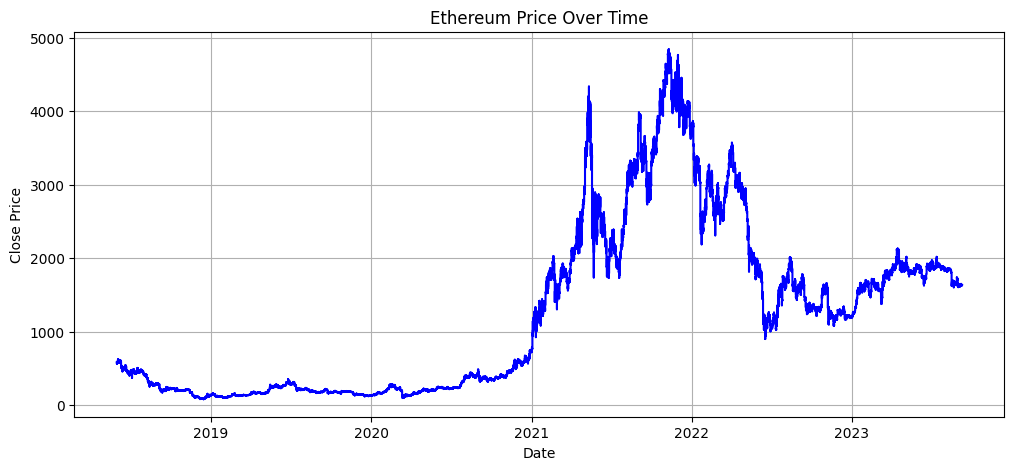

In [30]:
plot_crypto_price(currency_dfs, 'Ethereum')